In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [312]:
results_file = '../results/encoder-comparisons.csv'
df = pd.read_csv(results_file)

df.head()

,File,Raw,ZIP,PNG,RLE,JP2,CCT
0,(0003)-1-001.dcm,524288,295851,272555,304698,307826,224170
1,(0004)-1-002.dcm,524288,297801,274329,304374,309471,224967
2,(0005)-1-003.dcm,524288,300580,276610,304832,311475,226024
3,(0006)-1-004.dcm,524288,301763,277461,303902,312502,226337
4,(0007)-1-005.dcm,524288,301356,278105,303304,312964,226024


Text(0, 0.5, 'File Size (bytes)')

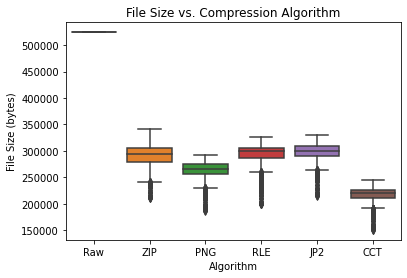

In [313]:

melt = pd.melt(df.drop('File', axis = 1))
sns.boxplot(x = 'variable', y = 'value', data = melt)

plt.title('File Size vs. Compression Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('File Size (bytes)')


In [314]:

raw = df['Raw']
cols = df.columns[1:]

ratio_dict = {}
saved_dict = {}
total_dict = {}

for col in cols:

	ratio = raw.sum() / df[col].sum()
	saved = 100 * (1 - df[col].sum() / raw.sum())
	total = df[col].sum() / 1_000_000_000
	
	ratio_dict[col] = ratio
	saved_dict[col] = saved
	total_dict[col] = total


In [315]:
ratio = pd.DataFrame({"Algorithm": list(ratio_dict.keys()), "Compression Ratio (X)": list(ratio_dict.values())})
saved = pd.DataFrame({"Algorithm": list(saved_dict.keys()), "Space Saved (%)": list(saved_dict.values())})
total = pd.DataFrame({"Algorithm": list(total_dict.keys()), "Total Size (GB)": list(total_dict.values())})

ratio

,Algorithm,Compression Ratio (X)
0,Raw,1.000000
1,ZIP,1.805597
2,PNG,1.994849
3,RLE,1.792253
4,JP2,1.763240
5,CCT,2.422033


Text(0.5, 1.0, 'Compression Ratio vs. Compression Algorithm')

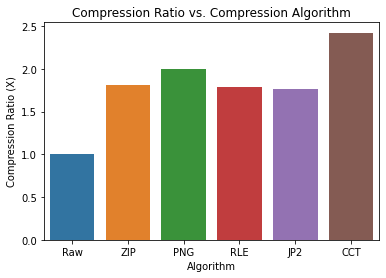

In [316]:
sns.barplot(x = 'Algorithm', y = 'Compression Ratio (X)', data = ratio)
plt.title('Compression Ratio vs. Compression Algorithm')

Text(0.5, 1.0, 'Space Saved vs. Compression Algorithm')

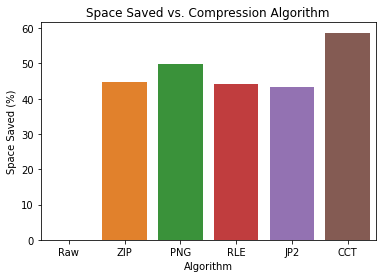

In [321]:
sns.barplot(x = 'Algorithm', y = 'Space Saved (%)', data = saved)
plt.title('Space Saved vs. Compression Algorithm')

Text(0.5, 1.0, 'Total Dataset Size vs. Compression Algorithm')

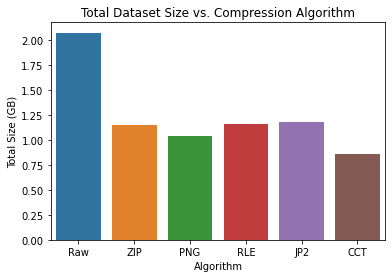

In [318]:
sns.barplot(x = 'Algorithm', y = 'Total Size (GB)', data = total)
plt.title('Total Dataset Size vs. Compression Algorithm')

In [319]:
def percent_increase(start, final):
	return (final - start) / abs(start)

In [320]:
ratios = dict(zip(ratio['Algorithm'], ratio['Compression Ratio (X)']))

for col in cols[:-1]:
	inc = percent_increase(ratios[col], ratios['CCT']) * 100
	print(f'(ratio) {col} to CCT increase: {inc:.3f}%')


(ratio) Raw to CCT increase: 142.203%
(ratio) ZIP to CCT increase: 34.140%
(ratio) PNG to CCT increase: 21.414%
(ratio) RLE to CCT increase: 35.139%
(ratio) JP2 to CCT increase: 37.363%
